# Exercise - GeoPandas

Now that you've been shown how to use GeoPandas, it your turn to wrangle some data related to the North West of England.

Working in your PSGs, use what you have just observed (and learned) to create your own custom map. In the cells below, there will be omissions (denoted with **\*\***) that need to be completed correctly to move on to the next step.

Once completed, you should have a map that looks that the one below…

<img src="../images/map_ex_example.jpg" alt="ap" width="450"/>

### Import modules

This exercise will require certain libraries to be imported. Can you spot the omissions below?

In [1]:
# Replace the ** below and run the code
import contextily as ctx
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

### Load LSOA shape file

Next we're going to load a zip file entitled `lsoa_dec_2011_eng_wales.zip`. This zip contains the shape files for LSOAs in England and Wales.

The CRS for the shape file is EPSG:4326. Update the code below to load the geodataframe.

[GeoPandas read_file documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html)


In [3]:
# Replace the ** below and run the code
filename = "zip://../data/lsoa_dec_2011_eng_wales.zip"
# Note we are not defining the CRS below
lsoa_gdf = geopandas.read_file(filename)

Lets take a look a look at the first few rows of data the geodataframe.

In [4]:
# Replace the ** below and run the code
lsoa_gdf.head(3)

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,geometry
0,1,E01000001,City of London 001A,City of London 001A,133320.768872,2291.846072,"POLYGON ((-0.09726 51.52158, -0.09649 51.52028..."
1,2,E01000002,City of London 001B,City of London 001B,226191.272990,2433.960112,"POLYGON ((-0.08810 51.51941, -0.08927 51.51752..."
2,3,E01000003,City of London 001C,City of London 001C,57302.966538,1142.359799,"POLYGON ((-0.09676 51.52325, -0.09644 51.52282..."


Create a simple plot using the `plot()` method for the Geopandas DataFrame. 

Which object will be calling the `plot()` method on?

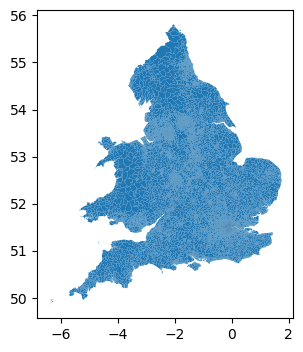

In [5]:
# Replace the ** below and run the code
lsoa_gdf.plot(figsize=(4,4));

## Using Spatial Relationship methods to select lower super output areas

First we'll need to import county boundary shape file, exactly as we did in the code along.

Which method will be required to load the file?

What epsg was used in the code along for this same file?

In [6]:
# Replace the ** below and run the code
filename = "zip://../data/Counties_and_Unitary_Authorities__December_2017" + \
    "__Boundaries_UK-shp.zip"

# Read file....
counties_gdf = geopandas.read_file(filename)

# Manually set crs using `.set_crs()`
counties_gdf = counties_gdf.set_crs(epsg=27700)

Lets take a look at the the data before visualising using the `plot()` method.

In [7]:
counties_gdf.head()

,objectid,ctyua17cd,ctyua17nm,ctyua17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.676159,9.355951e+07,71707.407523,"MULTIPOLYGON (((447213.900 537036.104, 447228...."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.388858e+07,43840.866561,"MULTIPOLYGON (((448958.901 521835.695, 449045...."
2,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,54.567520,2.448203e+08,97993.391012,"MULTIPOLYGON (((455752.600 528195.705, 455738...."
3,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,54.556911,2.049622e+08,119581.595543,"MULTIPOLYGON (((444157.002 527956.303, 444165...."
4,5,E06000005,Darlington,None,428029,515649,-1.56835,54.535351,1.974757e+08,107206.401694,"POLYGON ((423496.602 524724.298, 423497.204 52..."


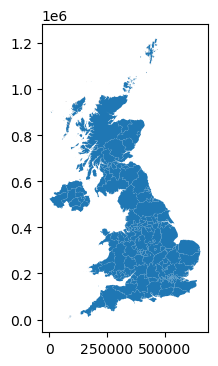

In [8]:
# Replace the ** below and run the code
# Plot the data
counties_gdf.plot(figsize=(4,4));

Although not covered in the code along, it's a good idea to see how to identify which CRS a geodataframe is using; and if necessary change it on the fly!

In [9]:
# First lets `.crs` on the lsoa_gdf
# We can see this is EPSG:4326 /  WGS 84
print("Details of 'lsoa_gdf' CRS below....")
lsoa_gdf.crs

Details of 'lsoa_gdf' CRS below....


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
# Next lets `.crs` on the counties_gdf
# We can see this is EPSG:27700 /  British National Grid
print("Details of 'counties_gdf' CRS below....")
counties_gdf.crs

Details of 'counties_gdf' CRS below....


<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

Given these aren't the same, lets use the `.to_crs()` method to change the CRS of EPSG:4326.

In [11]:
counties_gdf.to_crs(epsg=4326, inplace=True)

Now we'll use both lambda and map functions to identify six different areas within the Merseyside / North West area.

### Finding the North West/ Merseyside data

Next we meed to identify rows that are included in the list below using the Pandas `map` lambda function.

List of counties: Manchester, West Lancashire, Wirral, Blackpool, Liverpool, Sefton, Knowsley.

In [12]:
# Replace the ** below and run the code
mersey_nw = \
    counties_gdf['ctyua17nm'].map(
        lambda x: x in ['Lancashire',  'Wirral', 'Blackpool',
                        'Liverpool', 'Sefton', 'Knowsley'])

The outputs (booleans) will then be mapped to a new column within the `counties_gdf`

In [13]:
# Replace the ** below and run the code
counties_gdf['mersey_nw'] = mersey_nw

Next, create a mask based on the new column (created above) containing True values...

In [14]:
# Replace the ** below and run the code
mask = counties_gdf['mersey_nw'] == True

... This mask will then be used to filter just the counties we're interested. This new varaible will be `mnw`.

In [15]:
# Replace the ** below and run the code
mnw = counties_gdf.loc[mask]

Finally, plot the Mersey/ North West area.

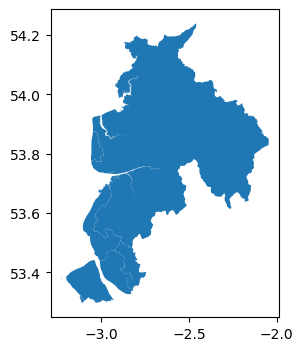

In [16]:
# Visualising the filtered area
mnw.plot(figsize=(4,4));

### Merging areas together

The six individual counties will then be merged into a just one, using dissolve. This will be the `merged_gdf` variable.

https://geopandas.org/aggregation_with_dissolve.html

In [17]:
# Replace the ** below and run the code
merged_gdf = counties_gdf.dissolve(by='mersey_nw')
merged_gdf

,geometry,objectid,ctyua17cd,ctyua17nm,ctyua17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths
mersey_nw,,,,,,,,,,,
False,"MULTIPOLYGON (((-6.39942 49.86527, -6.39941 49...",1,E06000001,Hartlepool,Ynys Môn,447157,531476,-1.27023,54.676159,9.355951e+07,71707.407523
True,"MULTIPOLYGON (((-3.12190 53.32249, -3.12109 53...",9,E06000009,Blackpool,None,332763,436633,-3.02284,53.821609,3.485151e+07,34940.040773


Now we select just the geometry Mersey North West (`mersey_nw`) row, This has an index value of 'True'.

The filtered geometry will then be saved as a new variable, `mnw_geometry`.

In [18]:
# Replace the ** below and run the code
mnw_geometry = merged_gdf.loc[True].geometry

Lets take a look at the shape of the filtered geometry.

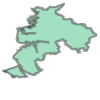

In [19]:
mnw_geometry

### Spatial relationships

To get all LSOA in Mersey/ North West  area we need to apply a test for `overlaps` or `within`. These will be used to create a `mask`

In [20]:
# Replace the ** below and run the code
mask = (lsoa_gdf.overlaps(mnw_geometry)) | (lsoa_gdf.within(mnw_geometry))

Create new Geopands DataFrame (`mersey_nw_lsoa`) by applying the above mask to the `lsoa_gdf` geodataframe. Once this is done, take a look af the first 5 rows.

In [21]:
# Replace the ** below and run the code
mersey_nw_lsoa = lsoa_gdf.loc[mask]
mersey_nw_lsoa.head()

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,geometry
4653,4654,E01004777,Bolton 004A,Bolton 004A,3.459544e+05,4588.216605,"POLYGON ((-2.55171 53.59937, -2.55083 53.59854..."
4656,4657,E01004780,Bolton 009B,Bolton 009B,6.228242e+06,22362.777688,"POLYGON ((-2.58990 53.60869, -2.58976 53.60812..."
4759,4760,E01004884,Bolton 007E,Bolton 007E,5.698294e+06,16631.651013,"POLYGON ((-2.50785 53.61112, -2.50592 53.61094..."
4763,4764,E01004888,Bolton 004C,Bolton 004C,3.764119e+05,4102.103843,"POLYGON ((-2.54115 53.61025, -2.54051 53.60875..."
4764,4765,E01004889,Bolton 004D,Bolton 004D,3.348993e+05,3945.291539,"POLYGON ((-2.55162 53.60793, -2.55109 53.60765..."


Lets plot the filtered LSOAs

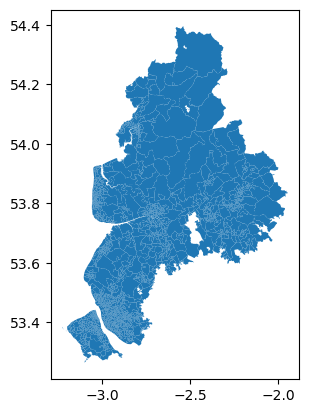

In [22]:
#  Replace the ** below and run the code
mersey_nw_lsoa.plot();

### Loading point data (hospitals) and selecting those in the Merseyside / North West area

Lets use the `read_file` method to load the CSV containing hospital location data then take a look at the first few rows.

In [23]:
# Replace the ** below and run the code
hospitals_gdf = geopandas.read_file('../data/hosp_107.csv')
hospitals_gdf.head(3)

,hospital,lat,long,Strategic Clinical Network,Stroke Team,Local,geometry
0,RM70AG,51.5686204781614,0.179031,London SCN,"Queen's Hospital, Romford",0,None
1,E11BB,51.519024600693,-0.058075031814056,London SCN,The Royal London Hospital,0,None
2,SW66SX,51.4737150883794,-0.212721758225151,London SCN,"Charing Cross Hospital, London",0,None


Create a `geometry` field manually using the `.points_from_xy` method

In [24]:
# Replace the ** below and run the code
hospitals_gdf.geometry = geopandas.points_from_xy(
        hospitals_gdf.long, hospitals_gdf.lat)

Set CRS for geometry, using `epsg=4326` for lat/long then take a look at the first few rows. 

In [25]:
# Replace the ** below and run the code
hospitals_gdf = hospitals_gdf.set_crs(epsg=4326)
hospitals_gdf.head(3)

,hospital,lat,long,Strategic Clinical Network,Stroke Team,Local,geometry
0,RM70AG,51.5686204781614,0.179031,London SCN,"Queen's Hospital, Romford",0,POINT (0.17903 51.56862)
1,E11BB,51.519024600693,-0.058075031814056,London SCN,The Royal London Hospital,0,POINT (-0.05808 51.51902)
2,SW66SX,51.4737150883794,-0.212721758225151,London SCN,"Charing Cross Hospital, London",0,POINT (-0.21272 51.47372)


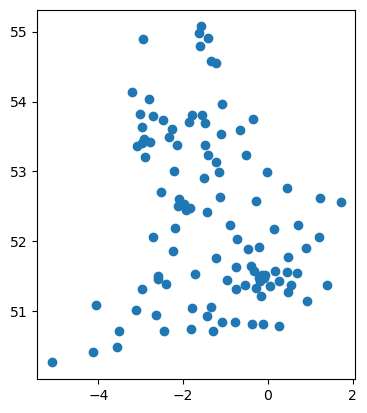

In [26]:
hospitals_gdf.plot();

Identify hospitals `within` the Mersey North West geometry zone we created earlier.

In [27]:
mask = hospitals_gdf.within(mnw_geometry)
mnw_hospitals = hospitals_gdf.loc[mask]
mnw_hospitals

,hospital,lat,long,Strategic Clinical Network,Stroke Team,Local,geometry
39,L97AL,53.466323,-2.931104,Cheshire and Mersey SCN,"University Hospital Aintree, Liverpool",0,POINT (-2.93110 53.46632)
41,L78XP,53.4095051005197,-2.96480875690615,Cheshire and Mersey SCN,Royal Liverpool University Hospital,0,POINT (-2.96481 53.40951)
42,PR86PN,53.6336637202891,-2.978159,Cheshire and Mersey SCN,Southport and Formby District General,0,POINT (-2.97816 53.63366)
43,L355DR,53.420469,-2.784954,Cheshire and Mersey SCN,"Whiston Hospital, Prescot",0,POINT (-2.78495 53.42047)
44,CH495PE,53.370214,-3.096184,Cheshire and Mersey SCN,"Arrowe Park Hospital, Wirral",0,POINT (-3.09618 53.37021)
45,FY38NR,53.8206684794917,-3.0162644832348,Manchester; Lancashire & S.Cumbria SCN,Blackpool Victoria Hospital,0,POINT (-3.01626 53.82067)
47,PR29HT,53.79135,-2.707403,Manchester; Lancashire & S.Cumbria SCN,Royal Preston Hospital,0,POINT (-2.70740 53.79135)
52,LA14RP,54.042726,-2.799232,Manchester; Lancashire & S.Cumbria SCN,Royal Lancaster Infirmary,0,POINT (-2.79923 54.04273)


### Bring in travel times to closest stroke unit/ hospital

Import table of travel times from LSOA to closest stroke unit (using `read_csv`) and then take a look at the first few rows.

In [28]:
# Replace the ** below and run the code
travel_time = pd.read_csv('../data/lsoa_107_ivt.csv')
travel_time.head()

,area,admissions,time_to_thrombolysis_unit,IVT_unit_#,time_to_thrombectomy_unit,ET_unit_#,Add_benefit_per_1000,index_#_x,IVT unit,index_#_y,ET unit,IVT_rate,Adjusted_benefit
0,Welwyn Hatfield 010F,0.666667,17.666667,19,116.666667,17,18.861646,19,SG14AB,17,CB20QQ,11.0,10.373906
1,Welwyn Hatfield 012A,4.000000,20.716667,19,119.716667,17,18.631853,19,SG14AB,17,CB20QQ,11.0,10.247519
2,Welwyn Hatfield 002F,2.000000,18.816667,19,117.816667,17,18.774986,19,SG14AB,17,CB20QQ,11.0,10.326242
3,Welwyn Hatfield 002E,0.666667,19.000000,19,118.000000,17,18.761172,19,SG14AB,17,CB20QQ,11.0,10.318645
4,Welwyn Hatfield 010A,3.333333,17.700000,19,116.700000,17,18.859134,19,SG14AB,17,CB20QQ,11.0,10.372524


Merge data so that we get the `time_to_thrombolysis_unit` column, then take a look.

In [29]:
# Replace the ** below and run the code
mersey_nw_lsoa = mersey_nw_lsoa.merge(
    travel_time[['area', 'time_to_thrombolysis_unit']], left_on='lsoa11nm', right_on='area', how='left')

mersey_nw_lsoa.head()

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,geometry,area,time_to_thrombolysis_unit
0,4654,E01004777,Bolton 004A,Bolton 004A,3.459544e+05,4588.216605,"POLYGON ((-2.55171 53.59937, -2.55083 53.59854...",Bolton 004A,26.166667
1,4657,E01004780,Bolton 009B,Bolton 009B,6.228242e+06,22362.777688,"POLYGON ((-2.58990 53.60869, -2.58976 53.60812...",Bolton 009B,25.916667
2,4760,E01004884,Bolton 007E,Bolton 007E,5.698294e+06,16631.651013,"POLYGON ((-2.50785 53.61112, -2.50592 53.61094...",Bolton 007E,25.716667
3,4764,E01004888,Bolton 004C,Bolton 004C,3.764119e+05,4102.103843,"POLYGON ((-2.54115 53.61025, -2.54051 53.60875...",Bolton 004C,27.900000
4,4765,E01004889,Bolton 004D,Bolton 004D,3.348993e+05,3945.291539,"POLYGON ((-2.55162 53.60793, -2.55109 53.60765...",Bolton 004D,26.633333


## Mapping data with MatPlotLib


Using MatPlotLib gives us more power than the GeoPandas DataFrame `plot` method.

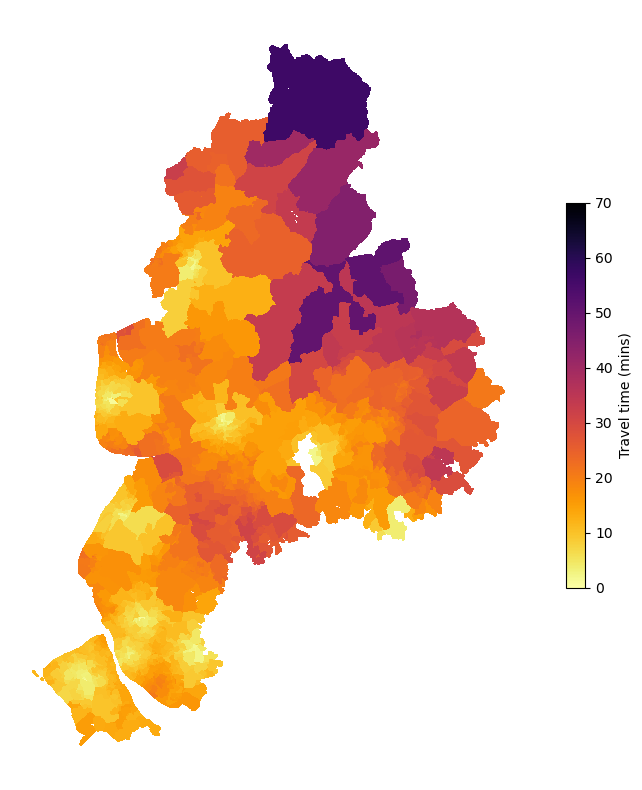

In [30]:
fig, ax = plt.subplots(figsize=(10, 10)) # Make max dimensions 10x10 inch
mersey_nw_lsoa.plot(ax=ax, # Set which axes to use for plot (only one here)
                 column='time_to_thrombolysis_unit', # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 vmin=0, # Manual scale min (remove to make automatic)
                 vmax=70, # Manual scale max (remove to make automatic)
                 cmap='inferno_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
                 legend_kwds={'shrink':0.5, 'label':'Travel time (mins)'},
                 # Set to display legend
                 legend=True)
ax.set_axis_off() # Turn of axis linea dn numbers
plt.savefig('map_ex1.jpg', dpi=300) # Save figure
plt.show()

Repeat, but display hospitals as an extra plot using `ax` as axis. We will add hospital name (just postcode here), and use contexity to add a base map.

When using base maps convert data to epsg:3857

In [31]:
# Replace the ** below and run the code
mersey_nw_lsoa = mersey_nw_lsoa.to_crs(epsg=3857) #4326
mnw_hospitals = mnw_hospitals.to_crs(epsg=3857) #3857

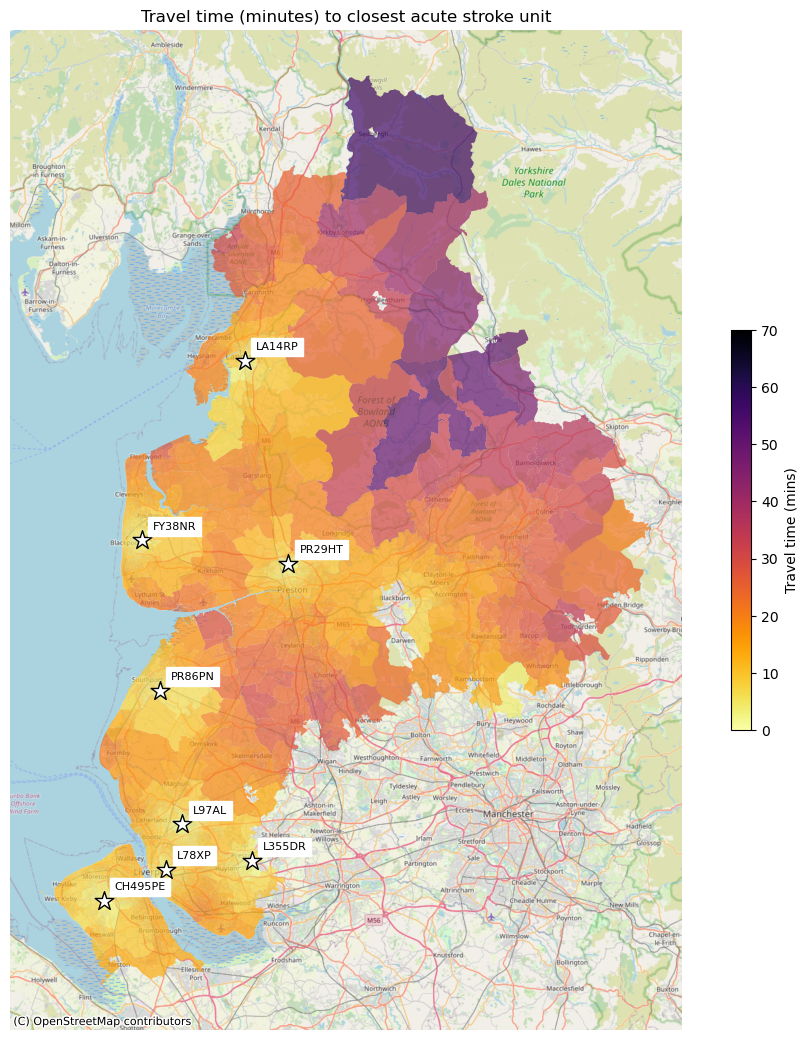

In [32]:
fig, ax = plt.subplots(figsize=(10, 10)) # Make max dimensions 10x10 inch
# Plot travel times for each LSOA
mersey_nw_lsoa.plot(ax=ax, # Set which axes to use for plot (only one here)
        column='time_to_thrombolysis_unit', # Column to apply colour
        # antialiasing loses transparency values
        # antialiased=False, # Avoids artifact boundry lines
        edgecolor='face', # Make LSOA boundry same colour as area
        linewidth=0.0,# Use linewidth=0 to hide boarder lines
        vmin=0, # Manual scale min (remove to make automatic)
        vmax=70, # Manual scale max (remove to make automatic)
        cmap='inferno_r', # Coloour map to use
        # Adjust size of colourmap key, and add label
        legend_kwds={'shrink':0.4, 'label':'Travel time (mins)'},
        # Set to display legend
        legend=True,
        # Set transparancy (to help reveal basemap)
        alpha = 0.70)

# Plot location of hospitals
mnw_hospitals.plot(ax=ax, edgecolor='k', facecolor='w', markersize=200, 
                  marker='*')
# Add labels
for x, y, label in zip(
    mnw_hospitals.geometry.x, mnw_hospitals.geometry.y, mnw_hospitals.hospital):
        ax.annotate(label, xy=(x, y), xytext=(8, 8), textcoords="offset points",
                    backgroundcolor="w", fontsize=8)
        
# Add base map (note that we specifiy the same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)
    
ax.set_axis_off() # Turn of axis line numbers
ax.set_title('Travel time (minutes) to closest acute stroke unit')
# Adjust for printing
ax.margins(0)
ax.apply_aspect()
plt.subplots_adjust(left=0.01, right=1.0, bottom=0.0, top=1.0)
# Save figure
plt.savefig('map_ex2.jpg', dpi=300)
plt.show()